In [35]:
!pip install catboost

In [36]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocessing and Model Selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Boosting Algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Suppressing warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from wordcloud import WordCloud,STOPWORDS

import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/transport_survey.csv')

df.columns



Index(['Gender', 'Age', 'Category', 'District (Location of your University)',
       'University', 'Travel Frequency ', 'Travel Mode',
       'Time Travel (Going To University)',
       'Time Travel (Returning From University)', 'Total Cost(In taka)',
       'Easy Access to main roads and public transport',
       'Are the roads well connected?', 'Overall transportation costs',
       'Are the road signs and traffic lights easy to see and understand?',
       'Is the road design and layout convenient?', 'Ride smoothness',
       'Vehicle safety features ', 'Driver's behavior while travelling',
       'Vehicle speed', 'The conditions of road in winter or rainy season',
       'Noise levels', 'Dust conditions',
       'Emergency access to public transport and road',
       'Traffic rule enforcement in public roads',
       'Traffic flow and jam control management', 'Social security',
       'Help us improve.  Discuss your like/Dislikes on the present transport system. Please suggest us t

In [37]:
#df = pd.read_csv("C:\\Users\\Acer\\Downloads\\paper\\sazia_maam\\transport_survey.csv")
#df = df.drop(columns=['Timestamp', 'Email Address', 'The email you used for logging in (We will keep it confidential)'])
new_col = [
    "sex", "age", "category", "district", "uni", "freq", "mode",
    "gotime", "rettime", "taka", "road", "network", "cost", "sign",
    "design", "smooth", "safety", "behavior", "speed", "weather",
    "noise", "dust", "emergency", "rules", "jam", "security",
    "suggestion", "sentiment"
]
df.columns = new_col
df.head()

,sex,age,category,district,uni,freq,mode,gotime,rettime,taka,...,speed,weather,noise,dust,emergency,rules,jam,security,suggestion,sentiment
0,Male,16-25,Student,Dhaka,MIST,Daily,"Rickshaw, On Foot",0-20 mins,20-40 mins,100-150,...,2,5,1,1,1,3,2,3,-,No
1,Male,16-25,Student,Dhaka,MIST,Daily,Rickshaw,0-20 mins,0-20 mins,50-100,...,3,3,3,3,4,3,2,2,By improving the application of traffic facili...,Yes
2,Male,16-25,Student,Chattogram,CU,Daily,CNG,80-100 mins,80-100 mins,100-150,...,4,4,4,2,1,2,2,1,It would be Helpful for us if the vehicles had...,No
3,Male,26-40,Teacher,Sylhet,SUST,Daily,"Rickshaw, Auto-Rickshaw, Public Bus",60-80 mins,60-80 mins,150-200,...,3,2,2,2,4,2,2,2,Would've been great if the traffic polices app...,No
4,Female,16-25,Student,Dhaka,BUET,Daily,"University Bus, Public Bus, Metro Rail",20-40 mins,60-80 mins,50-100,...,3,2,1,1,1,1,2,2,NaN,Yes


In [38]:
df.shape

(550, 28)

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to analyze categorical variables
def analyze_categorical_variable(df, column):
    """
    Calculates and displays descriptive statistics for a categorical variable.

    Args:
        df: The pandas DataFrame containing the data.
        column: The name of the categorical column to analyze.

    Returns:
        results_df: A DataFrame with descriptive statistics.
    """
    # Handle the multiselect column "mode" by exploding
    if column == "mode":
        exploded_values = df[column].str.split(", ").explode()  # Split and explode
        value_counts = exploded_values.value_counts()
    else:
        value_counts = df[column].value_counts()

    # Calculate frequencies and percentages
    total = len(df)
    frequencies = value_counts.values
    percentages = (frequencies / total) * 100

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        "Variable": value_counts.index,
        "Frequency": frequencies,
        "Percentage": percentages.round(2)
    })

    # Chi-square test
    #contingency_table = pd.crosstab(df[column], pd.Series([1] * len(df)))
    #chi2, p, dof, _ = chi2_contingency(contingency_table)

    # Add chi-square results to the DataFrame
    #results_df["χ2 value"] = round(chi2, 3)
    #results_df["df"] = dof
    #results_df["p value"] = round(p, 3)

    return results_df

# Function to analyze and display results for all categorical variables
def analyze_all_categorical_variables(df, categorical_columns):
    for column in categorical_columns:
        results = analyze_categorical_variable(df, column)
        print(f"\n**Distribution of {column}**")
        print(results)

# Load the dataset
# Replace with your dataset path
# df = pd.read_csv("C:\\Users\\Acer\\Downloads\\paper\\sazia_maam\\transport_survey.csv")

# Define categorical columns
categorical_columns = [
    "sex", "age", "category", "district", "uni", "freq", "mode",
    "road", "network", "sign", "design", "smooth", "safety", "behavior",
    "weather", "noise", "dust", "emergency", "rules", "jam", "security",
    "sentiment"
]

# Call the function to analyze all categorical variables
# Analyze each categorical column and display the results
for column in categorical_columns:
    results = analyze_categorical_variable(df, column)
    print(f"\n**Distribution of {column}**")
    print(results)



**Distribution of sex**
  Variable  Frequency  Percentage
0     Male        367       66.73
1   Female        183       33.27

**Distribution of age**
   Variable  Frequency  Percentage
0     16-25        490       89.09
1     26-40         58       10.55
2  above 40          2        0.36

**Distribution of category**
  Variable  Frequency  Percentage
0  Student        481       87.45
1  Teacher         69       12.55

**Distribution of district**
     Variable  Frequency  Percentage
0       Dhaka        406       73.82
1      Khulna         50        9.09
2    Rajshahi         36        6.55
3  Chattogram         31        5.64
4      Sylhet         27        4.91

**Distribution of uni**
  Variable  Frequency  Percentage
0     MIST        345       62.73
1     BUET         63       11.45
2     KUET         48        8.73
3     RUET         36        6.55
4       CU         30        5.45
5     SUST         28        5.09

**Distribution of freq**
       Variable  Frequency  Percent

In [40]:
# Apply LabelEncoder to the 'sentiment' column
df['sentiment'] = df['sentiment'].replace({
    'Yes': 2,
    'No': 1
})

K-Neighbors Classifier's Accuracy: 72.7273%
K-Neighbors Classifier's F1 Score: 0.7307
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        74
           1       0.57      0.64      0.61        36

    accuracy                           0.73       110
   macro avg       0.69      0.70      0.70       110
weighted avg       0.74      0.73      0.73       110



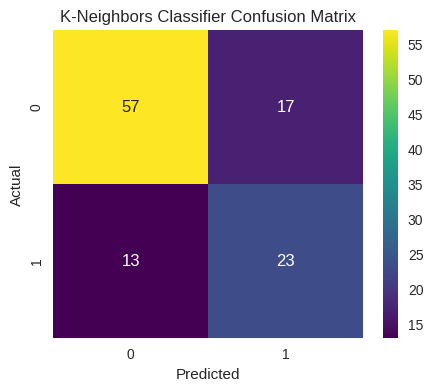

---------------------------------------------------------------------- 

Linear SVM's Accuracy: 70.0%
Linear SVM's F1 Score: 0.701
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        74
           1       0.54      0.56      0.55        36

    accuracy                           0.70       110
   macro avg       0.66      0.66      0.66       110
weighted avg       0.70      0.70      0.70       110



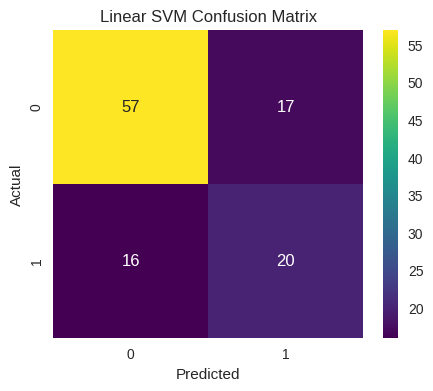

---------------------------------------------------------------------- 

Non-Linear SVM (RBF Kernel)'s Accuracy: 76.3636%
Non-Linear SVM (RBF Kernel)'s F1 Score: 0.7618
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        74
           1       0.65      0.61      0.63        36

    accuracy                           0.76       110
   macro avg       0.73      0.72      0.73       110
weighted avg       0.76      0.76      0.76       110



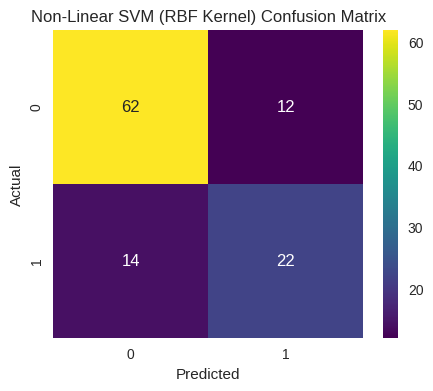

---------------------------------------------------------------------- 

Decision Tree Classifier's Accuracy: 73.6364%
Decision Tree Classifier's F1 Score: 0.7403
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        74
           1       0.59      0.67      0.62        36

    accuracy                           0.74       110
   macro avg       0.71      0.72      0.71       110
weighted avg       0.75      0.74      0.74       110



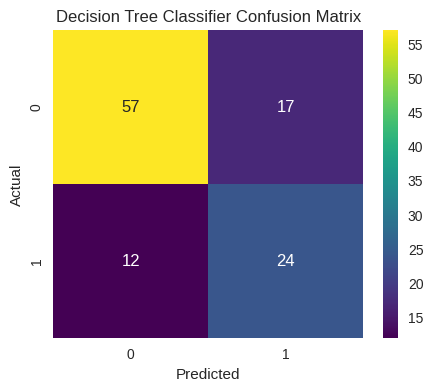

---------------------------------------------------------------------- 

Random Forest Classifier's Accuracy: 72.7273%
Random Forest Classifier's F1 Score: 0.7291
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        74
           1       0.58      0.61      0.59        36

    accuracy                           0.73       110
   macro avg       0.69      0.70      0.69       110
weighted avg       0.73      0.73      0.73       110



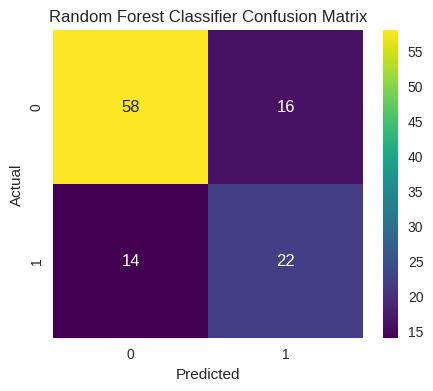

---------------------------------------------------------------------- 

Gradient Boosting Classifier's Accuracy: 73.6364%
Gradient Boosting Classifier's F1 Score: 0.7373
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.59      0.61      0.60        36

    accuracy                           0.74       110
   macro avg       0.70      0.70      0.70       110
weighted avg       0.74      0.74      0.74       110



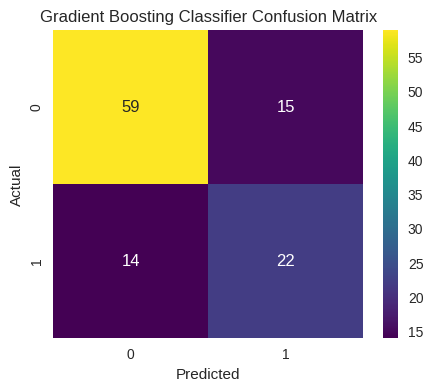

---------------------------------------------------------------------- 

XGBoost Classifier's Accuracy: 72.7273%
XGBoost Classifier's F1 Score: 0.7291
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        74
           1       0.58      0.61      0.59        36

    accuracy                           0.73       110
   macro avg       0.69      0.70      0.69       110
weighted avg       0.73      0.73      0.73       110



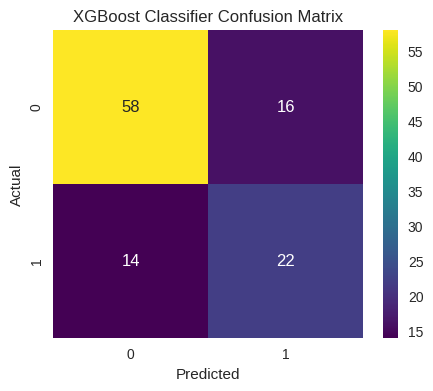

---------------------------------------------------------------------- 

Logistic Regression's Accuracy: 72.7273%
Logistic Regression's F1 Score: 0.7307
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        74
           1       0.57      0.64      0.61        36

    accuracy                           0.73       110
   macro avg       0.69      0.70      0.70       110
weighted avg       0.74      0.73      0.73       110



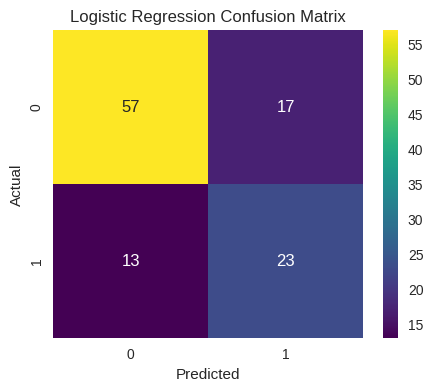

---------------------------------------------------------------------- 

AdaBoost Classifier's Accuracy: 73.6364%
AdaBoost Classifier's F1 Score: 0.7389
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        74
           1       0.59      0.64      0.61        36

    accuracy                           0.74       110
   macro avg       0.70      0.71      0.71       110
weighted avg       0.74      0.74      0.74       110



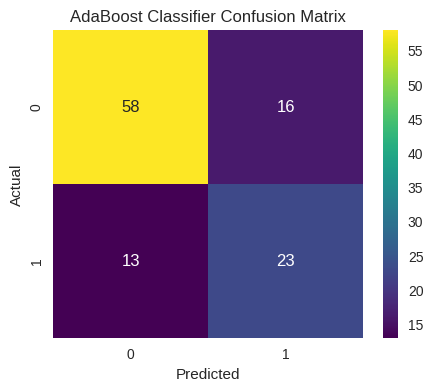

---------------------------------------------------------------------- 

CatBoost Classifier's Accuracy: 72.7273%
CatBoost Classifier's F1 Score: 0.7291
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        74
           1       0.58      0.61      0.59        36

    accuracy                           0.73       110
   macro avg       0.69      0.70      0.69       110
weighted avg       0.73      0.73      0.73       110



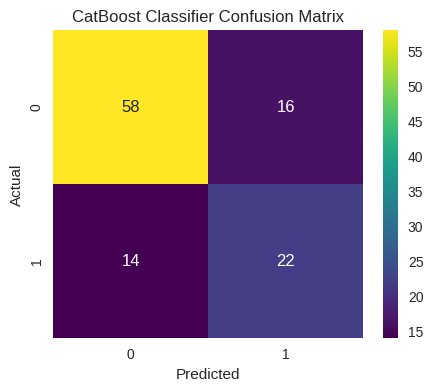

---------------------------------------------------------------------- 

LGBM Classifier's Accuracy: 72.7273%
LGBM Classifier's F1 Score: 0.7291
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        74
           1       0.58      0.61      0.59        36

    accuracy                           0.73       110
   macro avg       0.69      0.70      0.69       110
weighted avg       0.73      0.73      0.73       110



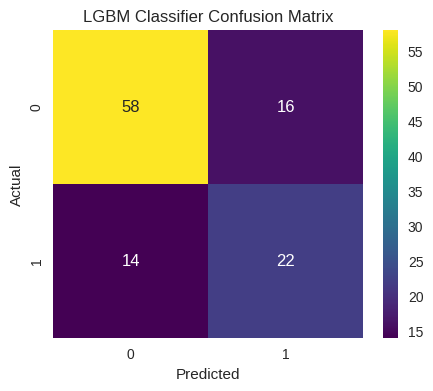

---------------------------------------------------------------------- 



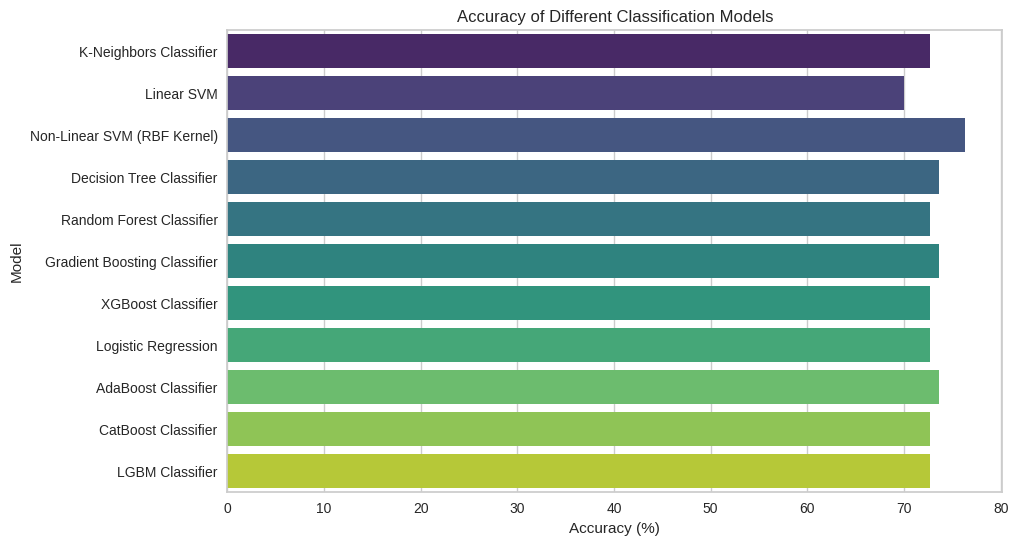

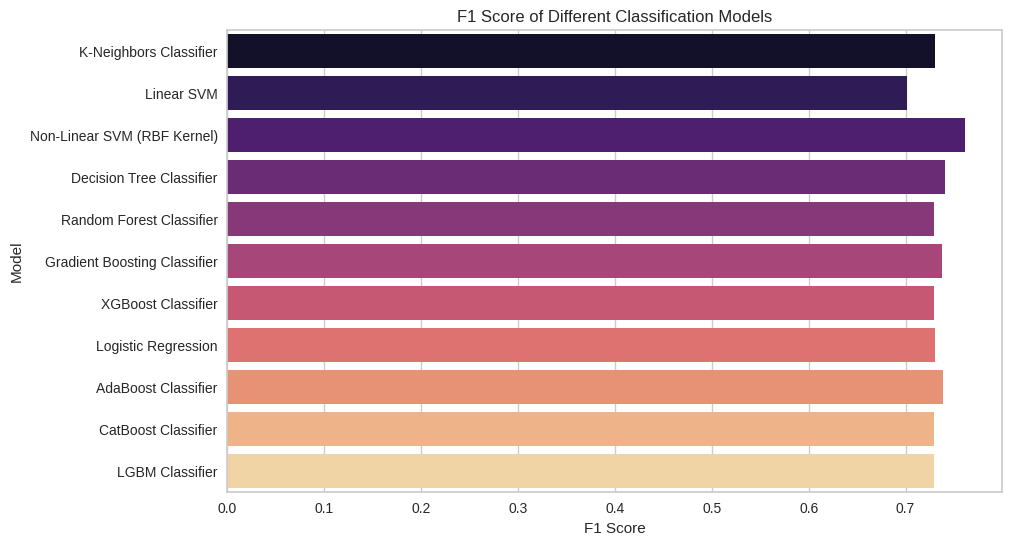

In [41]:

# Assuming 'df' is your DataFrame
X = df[["road", "network", "cost", "sign",
    "design", "smooth", "safety", "behavior", "speed", "weather",
    "noise", "dust", "emergency", "rules", "jam", "security"]]

# Adjusting target column to start from 0
y = df["sentiment"] - 1  # Subtracting 1 to make classes start from 0
#y = df["security"] #- 1  # Subtracting 1 to make classes start from 0

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Linear SVM": SVC(kernel='linear', random_state=42),
    "Non-Linear SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "CatBoost Classifier": CatBoostClassifier(random_state=42, verbose=False),
    "LGBM Classifier": LGBMClassifier(random_state=42, verbose=-1)
}

# Results list to store accuracies
results = []

# Loop through models, fit, predict, and print results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy, F1 score, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Append results
    results.append({"Model": name, "Accuracy": round(accuracy, 4), "F1 Score": round(f1, 4)})

    # Print accuracy and classification report
    print(f"{name}'s Accuracy: {round(accuracy, 4)}%")
    print(f"{name}'s F1 Score: {round(f1, 4)}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="viridis", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print("-" * 70, "\n")

# Create a DataFrame to display the accuracy and F1 scores of all models
results_df = pd.DataFrame(results)

# Plot the accuracy of all models
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.xlabel("Accuracy (%)")
plt.title("Accuracy of Different Classification Models")
plt.show()

# Plot the F1 score of all models
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y="Model", data=results_df, palette="magma")
plt.xlabel("F1 Score")
plt.title("F1 Score of Different Classification Models")
plt.show()


In [42]:
# Create a DataFrame to display the accuracy and F1 scores of all models
evaluation_df = pd.DataFrame(results)

# Display the DataFrame
print(evaluation_df)

                           Model  Accuracy  F1 Score
0         K-Neighbors Classifier   72.7273    0.7307
1                     Linear SVM   70.0000    0.7010
2    Non-Linear SVM (RBF Kernel)   76.3636    0.7618
3       Decision Tree Classifier   73.6364    0.7403
4       Random Forest Classifier   72.7273    0.7291
5   Gradient Boosting Classifier   73.6364    0.7373
6             XGBoost Classifier   72.7273    0.7291
7            Logistic Regression   72.7273    0.7307
8            AdaBoost Classifier   73.6364    0.7389
9            CatBoost Classifier   72.7273    0.7291
10               LGBM Classifier   72.7273    0.7291


In [43]:
#!pip install --upgrade xgboost

K-Neighbors Classifier's Mean Accuracy: 76.5455%
K-Neighbors Classifier's Mean F1 Score: 0.758
---------------------------------------------------------------------- 

Linear SVM's Mean Accuracy: 78.3636%
Linear SVM's Mean F1 Score: 0.7757
---------------------------------------------------------------------- 

Non-Linear SVM (RBF Kernel)'s Mean Accuracy: 79.2727%
Non-Linear SVM (RBF Kernel)'s Mean F1 Score: 0.7827
---------------------------------------------------------------------- 

Decision Tree Classifier's Mean Accuracy: 71.0909%
Decision Tree Classifier's Mean F1 Score: 0.7131
---------------------------------------------------------------------- 

Random Forest Classifier's Mean Accuracy: 78.1818%
Random Forest Classifier's Mean F1 Score: 0.7743
---------------------------------------------------------------------- 

Gradient Boosting Classifier's Mean Accuracy: 77.6364%
Gradient Boosting Classifier's Mean F1 Score: 0.7709
------------------------------------------------------

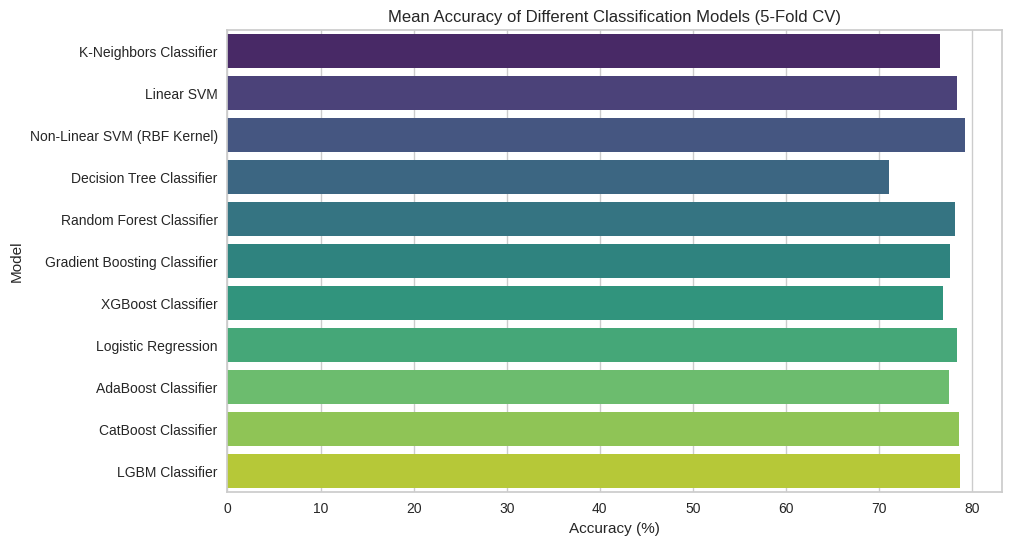

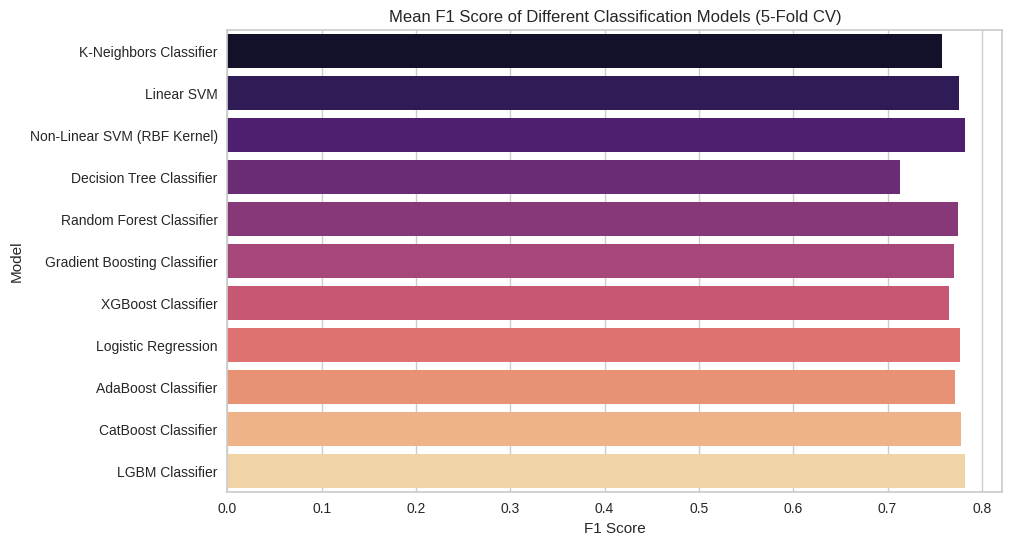

In [44]:
from sklearn.model_selection import cross_val_score

# Assuming 'df' is your DataFrame
X = df[["road", "network", "cost", "sign",
    "design", "smooth", "safety", "behavior", "speed", "weather",
    "noise", "dust", "emergency", "rules", "jam", "security"]]

# Adjusting target column to start from 0
y = df["sentiment"] - 1  # Subtracting 1 to make classes start from 0
#y = df["security"] - 1  # Subtracting 1 to make classes start from 0

# Define models
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Linear SVM": SVC(kernel='linear', random_state=42),
    "Non-Linear SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "CatBoost Classifier": CatBoostClassifier(random_state=42, verbose=False),
    "LGBM Classifier": LGBMClassifier(random_state=42, verbose=-1)
}

# Results list to store accuracies and F1 scores
results = []

# Loop through models, perform K-Folds cross-validation, and print results
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean() * 100
    mean_f1 = cross_val_score(model, X, y, cv=5, scoring='f1_weighted').mean()

    # Append results
    results.append({"Model": name, "Accuracy": round(mean_accuracy, 4), "F1 Score": round(mean_f1, 4)})

    # Print accuracy
    print(f"{name}'s Mean Accuracy: {round(mean_accuracy, 4)}%")
    print(f"{name}'s Mean F1 Score: {round(mean_f1, 4)}")
    print("-" * 70, "\n")

# Create a DataFrame to display the accuracy and F1 scores of all models
results_df = pd.DataFrame(results)

# Plot the accuracy of all models
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.xlabel("Accuracy (%)")
plt.title("Mean Accuracy of Different Classification Models (5-Fold CV)")
plt.show()

# Plot the F1 score of all models
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y="Model", data=results_df, palette="magma")
plt.xlabel("F1 Score")
plt.title("Mean F1 Score of Different Classification Models (5-Fold CV)")
plt.show()


In [45]:
# Create a DataFrame to display the accuracy and F1 scores of all models
evaluation_df = pd.DataFrame(results)

# Display the DataFrame
print(evaluation_df)

                           Model  Accuracy  F1 Score
0         K-Neighbors Classifier   76.5455    0.7580
1                     Linear SVM   78.3636    0.7757
2    Non-Linear SVM (RBF Kernel)   79.2727    0.7827
3       Decision Tree Classifier   71.0909    0.7131
4       Random Forest Classifier   78.1818    0.7743
5   Gradient Boosting Classifier   77.6364    0.7709
6             XGBoost Classifier   76.9091    0.7649
7            Logistic Regression   78.3636    0.7765
8            AdaBoost Classifier   77.4545    0.7712
9            CatBoost Classifier   78.5455    0.7783
10               LGBM Classifier   78.7273    0.7826


**TPOT autoML**

with data preprocessing

train test split 80-20

In [46]:
!pip install tpot

In [47]:
from tpot import  TPOTClassifier
from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np

#dataset preprocessing & train test split <specially for churn>
# Load the dataset
df = pd.read_csv('/content/transport_survey.csv')
new_col = [
    "sex", "age", "category", "district", "uni", "freq", "mode",
    "gotime", "rettime", "taka", "road", "network", "cost", "sign",
    "design", "smooth", "safety", "behavior", "speed", "weather",
    "noise", "dust", "emergency", "rules", "jam", "security",
    "suggestion", "sentiment"
]
df.columns = new_col
#df.head()

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_columns = [
    "road", "network", "cost", "sign",
    "design", "smooth", "safety", "behavior",
    "speed", "weather", "noise", "dust",
    "emergency", "rules", "jam", "security",
    "sentiment"
]

# Create a copy of the original DataFrame to work with
churn_df_trans = df.copy()

# Apply LabelEncoder to the 'sentiment' column
churn_df_trans['sentiment'] = df['sentiment'].replace({
    'Yes': 1,
    'No': 0
})

# Now you can update the original DataFrame with the transformed values
df.update(churn_df_trans)

# Display the first few rows of the updated DataFrame
#df.head()


df_X = df.drop(["sex", "age", "category", "district", "uni", "freq", "mode",
                "gotime", "rettime", "taka",
                "suggestion", "sentiment"], axis=1)
#churn_df_X = churn_df_X.drop("customerID", axis=1)
df_y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.8, test_size=0.2)
# Convert y_train and y_test to integers explicitly
y_train = y_train.astype(int)
y_test = y_test.astype(int)

import multiprocessing

if __name__ == '__main__':
    multiprocessing.set_start_method('forkserver', force=True)
    tpot =  TPOTClassifier(generations=5, population_size=20, verbosity=2,n_jobs = 20, random_state=50)
    tpot.fit(X_train, y_train)


print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8090909090909092

Generation 2 - Current best internal CV score: 0.8090909090909092

Generation 3 - Current best internal CV score: 0.8113636363636363

Generation 4 - Current best internal CV score: 0.8113636363636363

Generation 5 - Current best internal CV score: 0.8113636363636363

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.3, min_samples_leaf=17, min_samples_split=13, n_estimators=100)
0.8181818181818182


In [48]:
print(tpot.score(X_test, y_test))

0.8181818181818182


In [49]:
tpot.export('tpot_transport_pipeline.py')

**PyCaret autoML**

5 fold cross validation

with preprocessing

In [50]:
!pip install pycaret

In [51]:
from pycaret.classification import *

In [52]:
from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
import numpy as np
#dataset preprocessing & train test split <specially for churn>
# Load the dataset
df = pd.read_csv('/content/transport_survey.csv')
new_col = [
    "sex", "age", "category", "district", "uni", "freq", "mode",
    "gotime", "rettime", "taka", "road", "network", "cost", "sign",
    "design", "smooth", "safety", "behavior", "speed", "weather",
    "noise", "dust", "emergency", "rules", "jam", "security",
    "suggestion", "sentiment"
]
df.columns = new_col
#df.head()

# Apply LabelEncoder to the 'sentiment' column
df['sentiment'] = df['sentiment'].replace({
    'Yes': 2,
    'No': 1
})

#df.head()



In [53]:
df_setup = setup(data = df, target = 'sentiment', session_id=3435, ignore_features=["sex", "age", "category", "district", "uni", "freq", "mode",
    "gotime", "rettime", "taka", "suggestion"])

,Description,Value
0,Session id,3435
1,Target,sentiment
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(550, 28)"
5,Transformed data shape,"(550, 17)"
6,Transformed train set shape,"(385, 17)"
7,Transformed test set shape,"(165, 17)"
8,Ignore features,11
9,Numeric features,16


In [54]:
df_setup

In [55]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8130,0.8557,0.8130,0.8251,0.8159,0.5932,0.5985,0.1480
lr,Logistic Regression,0.7948,0.8386,0.7948,0.7909,0.7887,0.5133,0.5200,8.4320
gbc,Gradient Boosting Classifier,0.7896,0.8433,0.7896,0.7855,0.7858,0.5088,0.5116,0.4620
lda,Linear Discriminant Analysis,0.7844,0.8323,0.7844,0.7812,0.7782,0.4894,0.4969,0.0740
lightgbm,Light Gradient Boosting Machine,0.7844,0.8382,0.7844,0.7824,0.7817,0.5020,0.5047,0.1620
catboost,CatBoost Classifier,0.7844,0.8641,0.7844,0.7799,0.7790,0.4913,0.4964,1.0860
ridge,Ridge Classifier,0.7818,0.8326,0.7818,0.7774,0.7735,0.4772,0.4866,0.0880
rf,Random Forest Classifier,0.7818,0.8507,0.7818,0.7784,0.7771,0.4885,0.4933,0.5720
knn,K Neighbors Classifier,0.7792,0.8297,0.7792,0.7787,0.7776,0.4952,0.4973,0.2340
et,Extra Trees Classifier,0.7662,0.8412,0.7662,0.7617,0.7619,0.4541,0.4573,0.4340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)